In [2]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad
plt.rcParams['text.usetex'] = True
np.set_printoptions(precision=4)
import pandas as pd

In [5]:
fb, fc = 2, 8
rho = 200.0
R = 10.0; beta = 20; H = 12/60
vb,vc,vw = 25.0,30.,3.0;
gamma = 40/3600; 
B = 3.
U = lambda s: 1/vb + gamma/s
H = lambda s: (R/B)*U(s)
T = lambda x, s: s/2/vw + H(s)/2+x*U(s)

Vw = lambda x: -beta*x/vw
Vc = lambda x: -beta*x/vc - fc
Vb = lambda x, s: -beta*T(x, s) - fb 
Vs = lambda x,s: exp(Vw(x)) + exp(Vc(x)) + exp(Vb(x, s))
Dw = lambda x, s: exp(Vw(x))/Vs(x,s)
Dc = lambda x, s: exp(Vc(x))/Vs(x,s)
Db = lambda x, s: exp(Vb(x, s))/Vs(x,s)
Q = np.vectorize(lambda s: quad(lambda x: rho*Db(x, s), 0, R)[0])
K = np.vectorize(lambda s: quad(lambda x: rho*x*Db(x, s), 0, R)[0])
Qc = np.vectorize(lambda s: quad(lambda x: rho*Dc(x, s), 0, R)[0])
Qw = np.vectorize(lambda s: quad(lambda x: rho*Dw(x, s), 0, R)[0])
sQ = minimize(lambda x: -Q(x), R/5,  bounds=[(0.001, R)]).x[0]
sK = minimize(lambda x: -K(x), R/5, bounds=[(0.001, R)]).x[0]
print(np.array([sQ, sK, (sK - sQ)*100/sQ]))
sarr = np.array([0.3,sQ,sK])
df = pd.DataFrame({
    's':sarr*1000,
   'Q': Q(sarr), 
    'K': K(sarr),
    'xbar':K(sarr)/Q(sarr),
    'U':U(sarr)*60,
    'H': H(sarr)*60,
    'B': np.ones(3)*B,
    'R/B': R/B*np.ones(3),
    'L': K(sarr)*H(sarr)/R,
}).round({'s':0, 'Q':0,'K':0,'xbar':2,'U':2,'B':2, 'L': 1, 'H': 2, 'R/B':2})
print(df.to_latex(index=False))

[0.6448 0.7074 9.7053]
\begin{tabular}{rrrrrrrrr}
\toprule
    s &     Q &      K &  xbar &    U &     H &   B &  R/B &    L \\
\midrule
300.0 & 394.0 & 1076.0 &  2.73 & 4.62 & 15.41 & 3.0 & 3.33 & 27.6 \\
645.0 & 667.0 & 2582.0 &  3.87 & 3.43 & 11.45 & 3.0 & 3.33 & 49.2 \\
707.0 & 661.0 & 2612.0 &  3.95 & 3.34 & 11.14 & 3.0 & 3.33 & 48.5 \\
\bottomrule
\end{tabular}



In [ ]:
fig,ax = plt.subplots()
xarr = np.linspace(0, R, 200)
for (fun,mode) in [(Dw,'walk'),(Dc,'car'),(Db,'bus')]:
    ax.plot(xarr,[fun(x,0.5) for x in xarr],label=mode)
ax.legend(frameon=False);ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)
ax.set_ylim([0,ax.get_ylim()[1]])
ax.set_xlim([0,8])
ax.set_ylabel(r"mode share"); ax.set_xlabel(r"trip length $x$ (km)")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


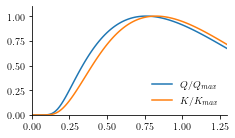

In [28]:
fig,ax = plt.subplots(figsize=(3.5,2))
sarr = np.linspace(0, 1.3, 100)
Qarr = np.array([Q(s) for s in sarr])
Karr = np.array([K(s) for s in sarr])
ax.plot(sarr, Qarr/max(Qarr), label  = r'$Q/Q_{\\max}$')
ax.plot(sarr, Karr/max(Karr), label  = r'$K/K_{\\max}$')
ax.set_xlim(sarr[0], sarr[-1])
ax.set_ylim(0, 1.1)
ax.legend(frameon=False);ax.spines['right'].set_visible(False); ax.spines['top'].set_visible(False)

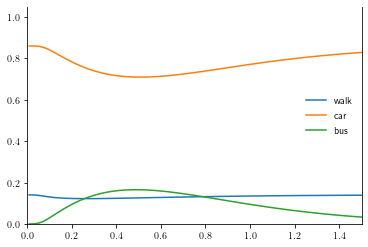

In [17]:
fig,ax = plt.subplots()
sarr = np.linspace(0.01, 1.5, 100)
for (fun,mode) in [(Dw,'walk'),(Dc,'car'),(Db,'bus')]:
    ps = [quad(lambda x: fun(x,s),0,R)[0]/R for s in sarr]
    ax.plot(sarr,ps,label=mode)
ax.set_ylim(0,1.05)
ax.set_xlim(0,sarr[-1])
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)

Text(0.5, 1.0, 's = 2.0')

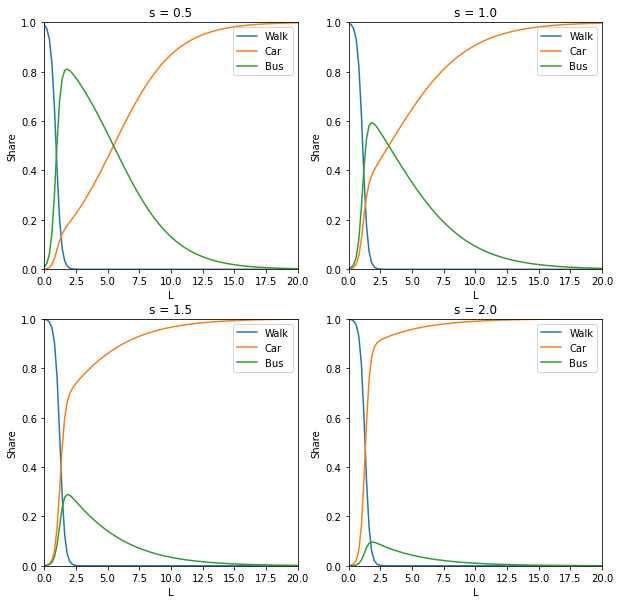

In [56]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 1)
Larr = np.linspace(0, R, 100)
ax.plot(Larr, [Dw(L, 0.5) for L in Larr], label='Walk')
ax.plot(Larr, [Dc(L, 0.5) for L in Larr], label='Car')
ax.plot(Larr, [Db(L, 0.5) for L in Larr], label='Bus')
ax.legend()
ax.set_ylim(0, 1)
ax.set_xlim(0, R)
ax.set_xlabel("L")
ax.set_ylabel("Share")
ax.set_title("s = 0.5")

ax = fig.add_subplot(2, 2, 2)
ax.plot(Larr, [Dw(L, 1.0) for L in Larr], label='Walk')
ax.plot(Larr, [Dc(L, 1.0) for L in Larr], label='Car')
ax.plot(Larr, [Db(L, 1.0) for L in Larr], label='Bus')
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("Share")
ax.set_ylim(0, 1)
ax.set_xlim(0, R)
ax.set_title("s = 1.0")

ax = fig.add_subplot(2, 2, 3)
ax.plot(Larr, [Dw(L, 1.5) for L in Larr], label='Walk')
ax.plot(Larr, [Dc(L, 1.5) for L in Larr], label='Car')
ax.plot(Larr, [Db(L, 1.5) for L in Larr], label='Bus')
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("Share")
ax.set_ylim(0, 1)
ax.set_xlim(0, R)
ax.set_title("s = 1.5")

ax = fig.add_subplot(2, 2, 4)
ax.plot(Larr, [Dw(L, 2.0) for L in Larr], label='Walk')
ax.plot(Larr, [Dc(L, 2.0) for L in Larr], label='Car')
ax.plot(Larr, [Db(L, 2.0) for L in Larr], label='Bus')
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("Share")
ax.set_ylim(0, 1)
ax.set_xlim(0, R)
ax.set_title("s = 2.0")

In [50]:
sQ = minimize(lambda x: -Q(x), R/5, method='SLSQP', bounds=[(0.001, R)])
sK = minimize(lambda x: -K(x), R/5, method='SLSQP', bounds=[(0.001, R)])
sQ.x[0], sK.x[0], (sQ.x[0] - sK.x[0])*100/sQ.x[0]

(0.6537267319350689, 0.7457898285751381, -14.082810468459366)

(0.6537267319350689, 0.7457898285751381, -14.082810468459366)

In [26]:
H(sQ.x[0])

0.2487839656845963